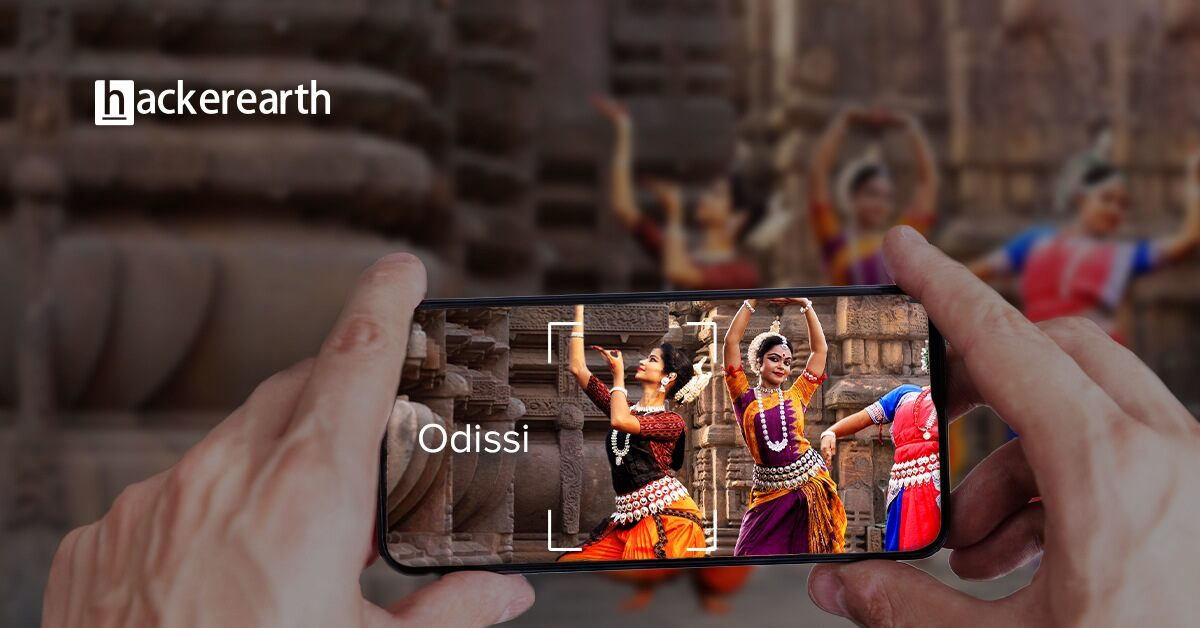

#***Identify The Dance Form***
Problem statement:

This International Dance Day, an event management company organized an evening of Indian classical dance performances to celebrate the rich, eloquent, and elegant art of dance. Post the event, the company planned to create a microsite to promote and raise awareness among the public about these dance forms. However, identifying them from images is a tough nut to crack.

Build an image tagging Deep Learning model that can help the company classify these images into eight categories of Indian classical dance.
Dataset

The dataset consists of 364 images belonging to 8 categories, namely

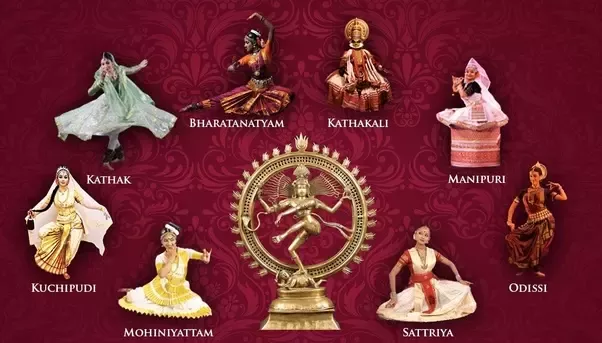

##**Improt Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### **Load train csv file for image classifiaction**

In [ ]:
Train_DF = pd.read_csv("/content/drive/MyDrive/dance_forms_DataSets/train.csv")

Train_DF.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


##**Data preprocessing & Analysis**

In [ ]:
Train_DF.shape

(364, 2)

In [ ]:
Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   364 non-null    object
 1   target  364 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [ ]:
Train_DF.describe()

,Image,target
count,364,364
unique,364,8
top,96.jpg,mohiniyattam
freq,1,50


###**How many types of Dance from are there?**

In [ ]:
Class_Name = Train_DF['target'].unique()

Class_Name

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [ ]:
Train_DF['target'].value_counts()

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

###**Plot the all Dance From type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


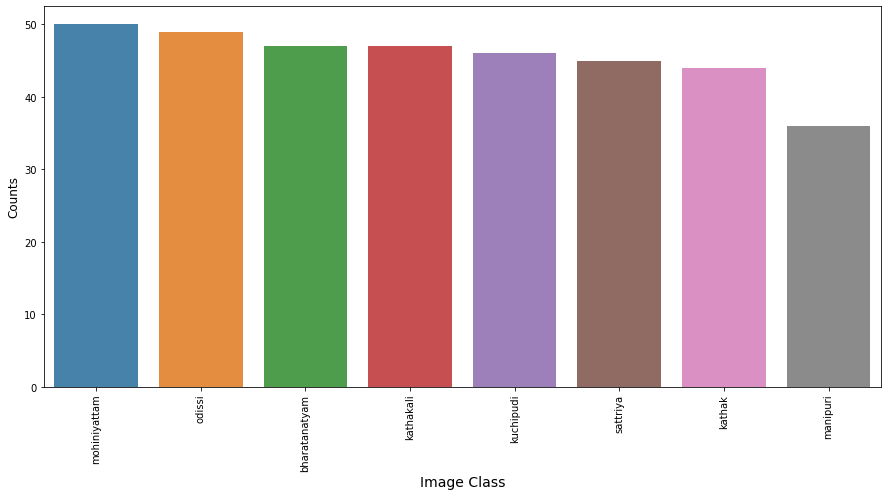

In [ ]:
label_counts = Train_DF['target'].value_counts()
plt.figure(figsize = (15,7))
sb.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Class', fontsize =14)
plt.ylabel('Counts', fontsize = 12)
plt.show()

##**X Independent Variable**

We have images in train folder. And, we have name of those Dance From in the csv format. We have to merge between these two to make the machine understand which image belongs to which Dance From.

Lets run a simple for loop

In [ ]:
from keras.preprocessing import image  # Image Preprocessing
from tqdm import tqdm  # Show Process bar

img_width = 150
img_heigth = 150

X = []   # Store the Images Here

for i in tqdm(range(Train_DF.shape[0])):
  Path = '/content/drive/MyDrive/dance_forms_DataSets/train/' + Train_DF['Image'][i]
  img = image.load_img(Path, target_size=(img_heigth,img_width,3))
  img_data = image.img_to_array(img)
  img_data = img_data / 255.0
  X.append(img_data)

100%|██████████| 364/364 [02:03<00:00,  2.94it/s]


In [ ]:
type(X),len(X)

(list, 364)

Nice, the images are extracted. We have got our x. Now we need y

##**Traget Variable is y**

In [ ]:
y = Train_DF['target']
y.head()

0         manipuri
1    bharatanatyam
2           odissi
3        kathakali
4           odissi
Name: target, dtype: object

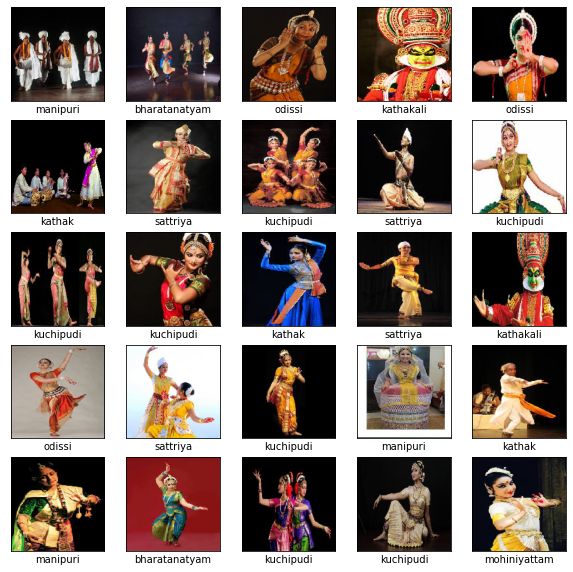

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(y[i])
plt.show()

### **y Depandent variable are Catgorical data**
As we can see in the above output,the last column contains categorical variables which are not suitable to apply directly for fitting in model.So we need to encode this variable.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LableEncoder = LabelEncoder()
y = LableEncoder.fit_transform(y)

In [ ]:
y

array([4, 0, 6, 2, 6, 1, 7, 3, 7, 3, 3, 3, 1, 7, 2, 6, 7, 3, 4, 1, 4, 0,
       3, 3, 5, 6, 1, 6, 6, 7, 2, 1, 2, 7, 0, 1, 0, 2, 6, 6, 6, 3, 4, 5,
       5, 6, 1, 4, 1, 5, 6, 7, 7, 6, 3, 7, 5, 4, 7, 1, 6, 7, 4, 2, 7, 2,
       4, 0, 1, 1, 7, 0, 2, 1, 5, 4, 1, 3, 6, 3, 0, 3, 0, 7, 1, 3, 5, 4,
       5, 0, 6, 3, 6, 3, 0, 5, 0, 0, 7, 1, 2, 5, 7, 0, 6, 1, 7, 7, 3, 6,
       1, 4, 2, 0, 5, 2, 3, 4, 5, 0, 5, 1, 2, 3, 0, 5, 0, 5, 2, 0, 5, 0,
       4, 4, 7, 5, 7, 0, 6, 5, 6, 5, 2, 6, 7, 0, 5, 6, 7, 4, 7, 7, 1, 6,
       2, 0, 5, 1, 3, 4, 7, 2, 5, 2, 1, 7, 5, 0, 0, 3, 6, 1, 6, 3, 5, 3,
       6, 7, 0, 0, 2, 6, 5, 4, 6, 2, 5, 5, 3, 1, 5, 4, 6, 6, 3, 2, 0, 2,
       5, 0, 2, 5, 6, 4, 3, 0, 7, 3, 2, 5, 2, 7, 5, 1, 3, 5, 3, 7, 5, 1,
       5, 7, 6, 1, 1, 2, 5, 5, 7, 1, 0, 1, 4, 2, 7, 4, 3, 4, 1, 0, 1, 3,
       2, 2, 6, 3, 0, 2, 3, 2, 6, 0, 7, 7, 1, 0, 6, 7, 0, 6, 7, 5, 2, 2,
       3, 3, 6, 4, 6, 7, 1, 6, 4, 0, 3, 0, 7, 5, 4, 0, 2, 5, 0, 1, 2, 3,
       0, 2, 5, 2, 3, 7, 7, 5, 2, 7, 7, 3, 4, 2, 4,

#==============   ***Deep Leraning Model***  ===================

#***Model Train Using Convolutional Neural Network (CNN)***

##**Using TensorFlow & keras Sequential API In Python**


##**Import TensorFlow & keras**
TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

In [ ]:
import tensorflow as tf
from keras.layers import Conv2D , Activation ,MaxPool2D ,Dense ,Flatten
from keras.models import Sequential

##**Create the convolutional base**
###As input, a CNN takes tensors of shape (image_height, image_width, color_channels)

In [ ]:
from re import M
from keras.layers.pooling import MaxPooling2D
Model = Sequential()

Model.add(Conv2D(16 , kernel_size=(3,3) , activation='relu', strides=(1,1) ,input_shape=X[0].shape))
Model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

Model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(32,kernel_size=(3,3) , activation='relu' ))
Model.add(MaxPooling2D(pool_size=(2,2)))

###**Adding dense layers on top**

In [ ]:
Model.add(Flatten())
Model.add(Dense(1000,activation='relu'))
Model.add(Dense(10,activation='softmax'))

##**Compile the Model**

In [ ]:
import keras
Model.compile(loss=keras.losses.sparse_categorical_crossentropy,metrics=['Accuracy'])

##**Fit Data to Train Deep Learning Model**

In [ ]:
Model.fit(np.array(X),np.array(y),batch_size=10, epochs=10, verbose=1)


Epoch 1/10
37/37 [==============================] - 11s 273ms/step - loss: 2.2619 - Accuracy: 0.1786
Epoch 2/10
37/37 [==============================] - 10s 272ms/step - loss: 1.5569 - Accuracy: 0.4423
Epoch 3/10
37/37 [==============================] - 10s 270ms/step - loss: 0.8875 - Accuracy: 0.7033
Epoch 4/10
37/37 [==============================] - 10s 274ms/step - loss: 0.4727 - Accuracy: 0.8599
Epoch 5/10
37/37 [==============================] - 10s 278ms/step - loss: 0.1947 - Accuracy: 0.9396
Epoch 6/10
37/37 [==============================] - 10s 278ms/step - loss: 0.2390 - Accuracy: 0.9478
Epoch 7/10
37/37 [==============================] - 10s 267ms/step - loss: 0.0930 - Accuracy: 0.9698
Epoch 8/10
37/37 [==============================] - 10s 275ms/step - loss: 0.0712 - Accuracy: 0.9835
Epoch 9/10
37/37 [==============================] - 10s 271ms/step - loss: 0.0790 - Accuracy: 0.9808
Epoch 10/10
37/37 [==============================] - 10s 262ms/step - loss: 0.0615 - Accura

##=======================  **Prediction** ============================

In [64]:
from keras.preprocessing import image

# Load image for prediction

img1 = image.load_img('/content/83.jpg',target_size=(150,150,3))
image1 = image.img_to_array(img1)
image1 = np.expand_dims(image1,axis=0)



### **image fit in ML Model for Predication**

In [65]:
Pred = Model.predict(image1)
Pred

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##**Decode the Prediction**

##**Sort the Prediction from least to Greatest**

In [66]:
list_index = [0,1,2,3,4,5,6,7]
x=Pred

for i in range(8):
  for j in range(8):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
# Shoe the sorted Label in  order
print(list_index)

[4, 1, 2, 3, 0, 5, 6, 7]


kathak : 100.0 %
bharatanatyam : 0.0 %
odissi : 0.0 %


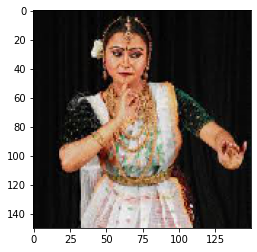

In [67]:
# Print the first 3 Classes 

plt.imshow(img1)
for i in range(3):
  print(Class_Name[list_index[i]],':' ,round(Pred[0][list_index[i]] * 100,2),'%')

#=========================== **End Model** ===============================